# ML 스터디 4장


##머신러닝에 필요한 수학

*   벡터와 벡터 연산

*   미분, 경사

*   행렬

*   지수 함수와 로그 함수





In [2]:
import numpy as np

a=np.array([2,1])
print(a)
type(a)

[2 1]


numpy.ndarray

In [3]:
#세로 벡터 만들어보기
c=np.array([[1,2],[3,4]])
print(c)
d=np.array([[1],[2]])
print(d)

[[1 2]
 [3 4]]
[[1]
 [2]]


In [4]:
#전치 (가로 벡터를 세로 벡터로, 세로 벡터를 가로 벡터로 변환)
print(d.T)

[[1 2]]


In [5]:
#벡터의 덧셈, 뺄셈
a = np.array([2, 1])
b = np.array([1, 3])
print(a + b)
print(a - b)

#벡터 * 스칼라
print(2 * a)

#내적 연산 (대응하는 요소를 곱한 뒤 더한 값)
c = np.array([4, 2])
print(b.dot(c))

#벡터의 크기 (요소들을 제곱해서 더한뒤 루트를 씌운 값)
print(np.linalg.norm(b))

[3 4]
[ 1 -2]
[4 2]
10
3.1622776601683795


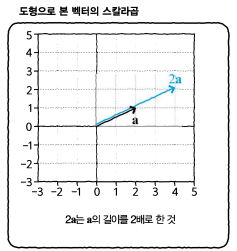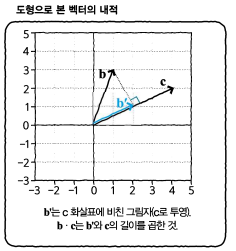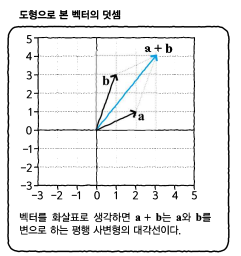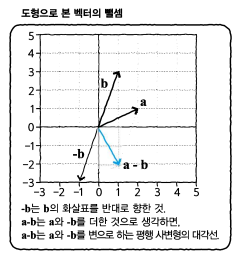

In [6]:
#내적을 통해 합 (시그마) 구하기
a = np.ones(1000) # [1 1 1 ... 1]
b = np.arange(1, 1001) # [1 2 3 ... 1000]
print(a.dot(b))
#이게 시그마 연산보다 계산속도 빠르다

500500.0




---


머신러닝은 결국 함수에서 최소나 최대인 입력을 찾는 문제 (최적화 문제)이다.

따라서 함수의 기울기를 아는 것이 중요하고 그 기울기를 도출하는 방법이 '미분'이다.

머신러닝에서 실제로 사용하는 것은 순수한 미분이 아닌, '편미분'이다.

복수의 변수를 가질 때 하나의 변수에만 주목하여 다른 변수는 상수라고 간주하여 미분하는 것을 '편미분'이라고 한다.




---



아래의 경사를 그린 예제를 보면 화살표를 따라가면 어디서 시작하더라도 높은 곳으로 가고 반대로 따라가면 어디서 시작하더라도 낮은 곳으로 간다.

경사가 최대점과 최소점을 찾는 데 중요한 개념인 것이다.

머신러닝에서는 오차 함수의 최소점을 구하기 위해 오차 함수의 경사를 계산한다


---



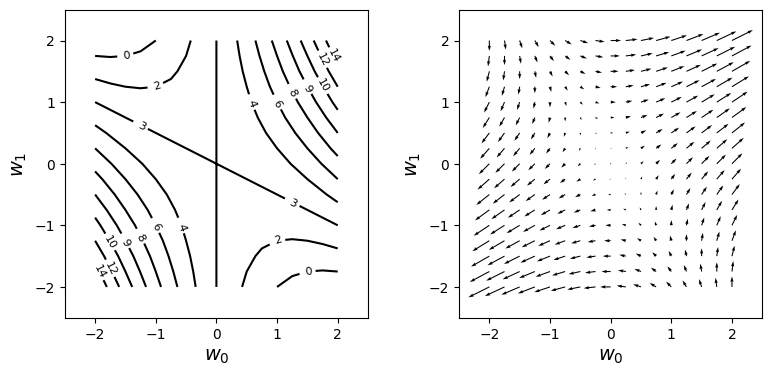

In [7]:
import matplotlib.pyplot as plt

def f(w0, w1): # f의 정의
  return w0**2 + 2 * w0 * w1 + 3
def df_dw0(w0, w1): # f의 w0에 관한 편미분
  return 2 * w0 + 2 * w1
def df_dw1(w0, w1): # f의 w1에 관한 편미분
  return 2 * w0 + 0 * w1

w_range = 2
dw = 0.25
w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0, w1)
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))

for i0 in range(wn):
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])

plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
cont = plt.contour(w0, w1, ff, 10, colors='k') #등고선 표시
cont.clabel(fmt='%2.0f', fontsize=8)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)

plt.subplot(1, 2, 2)
plt.quiver(w0, w1, dff_dw0, dff_dw1) #경사 벡터 표시
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.show()

In [8]:
#행렬
A=np.array([[1,2,3], [4,5,6]])
print(A)
B=np.array([[7,8,9], [10,11,12]])
print(B)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


In [9]:
#행렬의 덧셈과 뺄셈
print(A + B)
print(A - B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


In [10]:
#행렬의 곱과 나눗셈
A = np.array([1,2,3])
B = np.array([4,5,6])
print(A * B)
print(A / B)

[ 4 10 18]
[0.25 0.4  0.5 ]


In [11]:
#행렬 곱
A = np.array([[1,2,3],[-1,-2,-3]])
B = np.array([[4,-4],[5,-5],[6,-6]])
print(A.dot(B))

[[ 32 -32]
 [-32  32]]


In [12]:
#단위 행렬 (대각선 성분이 1이고 나머지가 0인 행렬)
print(np.identity(3)) # 3 X 3 단위행렬

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [13]:
#단위 행렬은 스칼라 1과 비슷하다
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
I = np.identity(3)
print(A.dot(I))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [14]:
#역행렬 (곱해서 단위 행렬이 되는 행렬)
#일반적으로 행렬 곱은 순서가 바뀌면 값이 달라지지만 역행렬은 순서에 관계 없이 단위 행렬이 됨
A = np.array([[1,2],[3,4]])
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [15]:
#행렬에서의 전치
A = np.array([[1,2,3],[4,5,6]])
print(A)
print(A.T)
#한번에 전치하는 경우 (AB).T = B.T * A.T

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


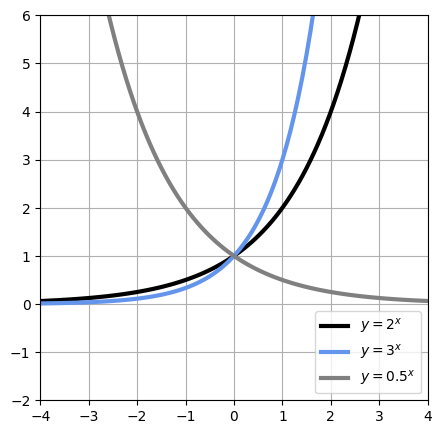

In [16]:
#지수함수 그려보기
%matplotlib inline
x = np.linspace(-4, 4, 100)
y = 2**x
y2 = 3**x
y3 = 0.5**x

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'black', linewidth=3, label='$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth=3, label='$y=3^x$')
plt.plot(x, y3, 'gray', linewidth=3, label='$y=0.5^x$')
plt.ylim(-2, 6)
plt.xlim(-4, 4)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

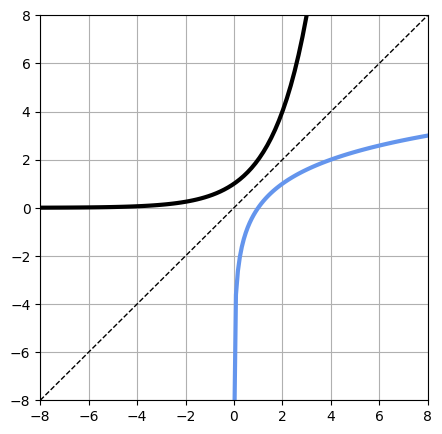

In [17]:
#로그함수 그려보기
x = np.linspace(-8, 8, 100)
y = 2**x

x2 = np.linspace(0.001, 8, 100)
y2 = np.log(x2) / np.log(2)
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'black', linewidth=3)
plt.plot(x2, y2, 'cornflowerblue', linewidth=3)
plt.plot(x, x, 'black', linestyle='--', linewidth=1)
plt.ylim(-8, 8)
plt.xlim(-8, 8)
plt.grid(True)
plt.show()

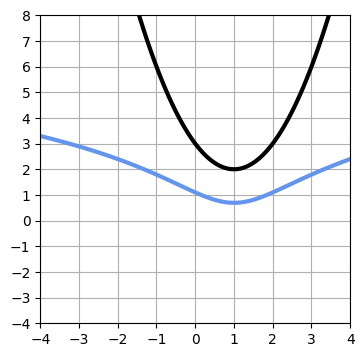

In [18]:
#log 를 취해도 극점을 취하는 x의 값은 바뀌지 않는다.
x = np.linspace(-4, 4, 100)
y = (x-1)**2 + 2
logy = np.log(y)

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)
plt.plot(x, logy, 'cornflowerblue', linewidth=3)
plt.yticks(range(-4,9,1))
plt.xticks(range(-4,5,1))
plt.ylim(-4, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

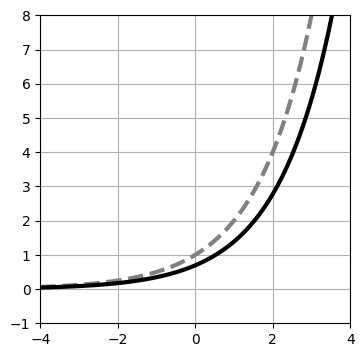

In [19]:
#지수 함수 미분
x = np.linspace(-4, 4, 100)
a = 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-1, 8)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()
# a = e 인 경우 미분해도 함수의 형태가 변하지 않는다 (그래서 밑이 e인 지수함수를 다양한 곳에 사용함 ex 시그모이드, 소프트맥스)

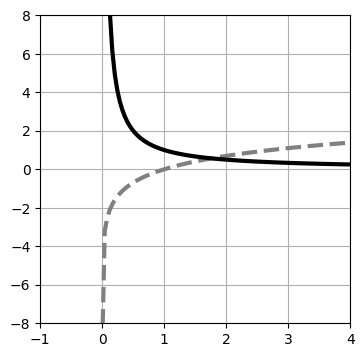

In [20]:
#로그 함수 미분
x = np.linspace(0.0001, 4, 100)
y = np.log(x)
dy = 1/x

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-8, 8)
plt.xlim(-1, 4)
plt.grid(True)
plt.show()

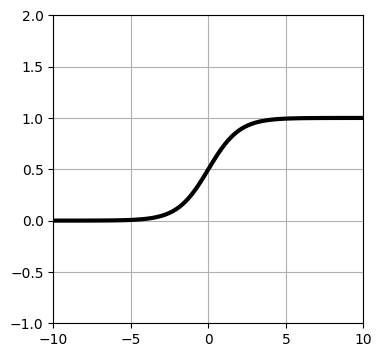

In [21]:
#시그모이드 함수
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)

plt.ylim(-1, 2)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()
# 미분하면 y(1 - y)

In [22]:
#소프트맥스 함수
def softmax(x0, x1, x2):
  u = np.exp(x0) + np.exp(x1) + np.exp(x2)
  return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u

y = softmax(2, 1, -1)
print(np.round(y, 2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


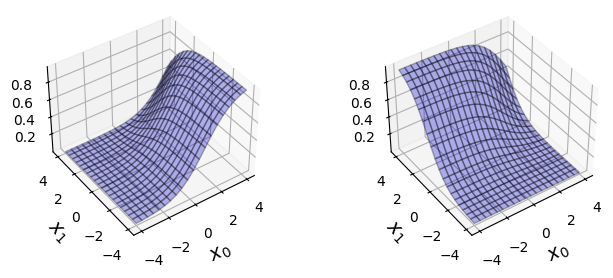

In [23]:
#소프트맥스 함수 그려보기
from mpl_toolkits.mplot3d import Axes3D

xn = 20
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3))
for i0 in range(xn):
  for i1 in range(xn):
    y[i1, i0, :] = softmax(x0[i0], x1[i1], 1)

xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(8, 3))
for i in range(2):
  ax = plt.subplot(1, 2, i + 1, projection='3d')
  ax.plot_surface(xx0, xx1, y[:, :, i],
                  rstride = 1, cstride = 1, alpha = 0.3,
                  color = 'blue', edgecolor = 'black')
  ax.set_xlabel('$x_0$', fontsize = 14)
  ax.set_ylabel('$x_1$', fontsize = 14)
  ax.view_init(40, -125)

plt.show()
# y_j 를 x_i로 미분하면 i=j면 시그모이드 형태, i!=j면 - (y_i * y_j)형태

소프트맥스 함수의 입력 $x_0, x_1$를 그 차이 $x = x_0 - x_1$로 나타낸 것이 시그모이드 함수이다.

시그모이드 함수를 다변수로 확장한 것이 소프트맥스 함수라고도 할 수 있다.

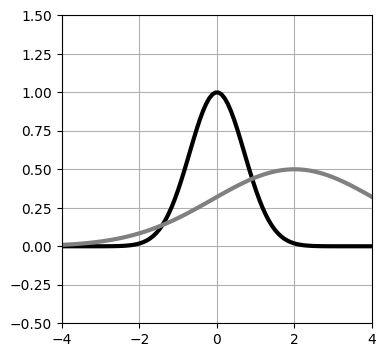

In [24]:
#가우스 함수
def gauss(mu, sigma, a):
  return a * np.exp(-(x -mu)**2 / sigma**2)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3)
plt.plot(x, gauss(2, 3, 0.5), 'gray', linewidth=3)
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show()

In [25]:
%matplotlib inline

def gauss(x, mu, sigma):
  N, D = x.shape
  c1 = 1 / (2 * np.pi)**(D / 2)
  c2 = 1 / (np.linalg.det(sigma)**(1/ 2))
  inv_sigma = np.linalg.inv(sigma)
  c3 = x - mu
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
    c5 = c5 + c4[:, d] * c3[:, d]
  p = c1 * c2 * np.exp(-c5 / 2)
  return p

x = np.array([[1,2], [2,1], [3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0], [0,1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


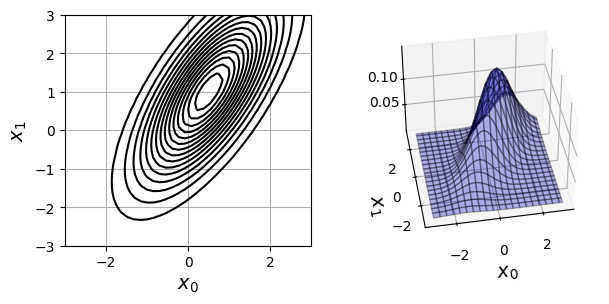

In [26]:
X_range0 = [-3, 3]
X_range1 = [-3, 3]

# 등고선 표시
def show_contour_gauss(mu, sig):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xx0.size, 1)), np.reshape(xx1, (xx1.size, 1))]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors='k')
    plt.grid(True)

# 3D 표시
def show3d_gauss(ax, mu, sig):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xx0.size, 1)), np.reshape(xx1, (xx1.size, 1))]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                    rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

mu = np.array([1, 0.5])  # (A)
sigma = np.array([[2, 1], [1, 1]])  # (B)
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()

##스터디 이후로 추가로 알게된 사항

